<a href="https://colab.research.google.com/github/deamonknoppix/Python_Projects/blob/main/Weather_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install neuralprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#NeuralProphet is the class we will use to predict the future temperature.
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv('Montreal_Weather.csv')
df.tail()

,date,max_temperature_v,min_temperature_v
0,2021-12-25,-2.38,-10.05
1,2020-12-25,-2.47,-10.20
2,2019-12-25,-2.77,-10.63
3,2018-12-25,-2.78,-10.70
4,2017-12-25,-2.46,-10.42


In [ ]:
df.date.unique()

array(['2021-12-25', '2020-12-25', '2019-12-25', '2018-12-25',
       '2017-12-25'], dtype=object)

In [ ]:
df.columns

Index(['date', 'max_temperature_v', 'min_temperature_v'], dtype='object')

In [ ]:
df.dtypes

date                  object
max_temperature_v    float64
min_temperature_v    float64
dtype: object

In [ ]:
df ['date'] = pd.to_datetime(df ['date'])
df.tail()

,date,max_temperature_v,min_temperature_v
0,2021-12-25,-2.38,-10.05
1,2020-12-25,-2.47,-10.20
2,2019-12-25,-2.77,-10.63
3,2018-12-25,-2.78,-10.70
4,2017-12-25,-2.46,-10.42


In [ ]:
df.dtypes

date                 datetime64[ns]
max_temperature_v           float64
min_temperature_v           float64
dtype: object

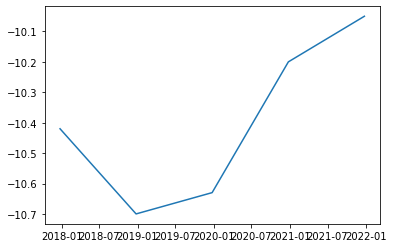

In [ ]:
plt.plot(df ['date'], df ['min_temperature_v'])
plt.show()

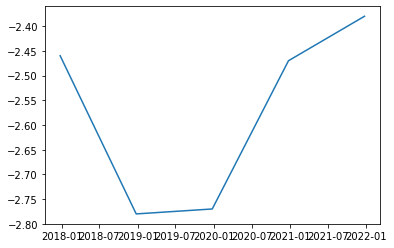

In [ ]:
plt.plot(df ['date'], df ['max_temperature_v'])
plt.show()

Training the forecasting model

In [ ]:
new_column = df[['date', 'min_temperature_v']] 
new_column.dropna(inplace=True)
new_column.columns = ['ds', 'y'] 
new_column.tail()

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)



,ds,y
0,2021-12-25,-10.05
1,2020-12-25,-10.20
2,2019-12-25,-10.63
3,2018-12-25,-10.70
4,2017-12-25,-10.42


Fitting the Model and Predicting the DataFrame

In [ ]:
n = NeuralProphet()
model = n.fit(new_column, freq='D')
forecast = n.predict(new_column)
forecast.tail()



INFO - (NP.df_utils._infer_frequency) - Major frequency Y corresponds to 80.0% of the data.
INFO:NP.df_utils:Major frequency Y corresponds to 80.0% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency Y
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - A

  0%|          | 0/100 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.87E-02, min: 1.00E-01
INFO:NP.utils_torch:lr-range-test results: steep: 1.87E-02, min: 1.00E-01


  0%|          | 0/100 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.87E-02, min: 4.33E-01
INFO:NP.utils_torch:lr-range-test results: steep: 1.87E-02, min: 4.33E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.27E-02
INFO:NP.forecaster:lr-range-test selected learning rate: 3.27E-02
Epoch[1000/1000]: 100%|██████████| 1000/1000 [00:13<00:00, 72.70it/s, SmoothL1Loss=0.000464, MAE=0.0158, RMSE=0.0189, Loss=0.000271, RegLoss=0]
INFO - (NP.df_utils._infer_frequency) - Major frequency -365D corresponds to 60.0% of the data.
INFO:NP.df_utils:Major frequency -365D corresponds to 60.0% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq D. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
INFO - (NP.df_utils._infer_frequency) - Major frequency -365D corresponds to 60.0% of the data.
INFO:NP.df_utils:Major freq

,ds,y,residual1,yhat1,trend,season_yearly
0,2017-12-25,-10.42,-0.026723,-10.446723,-10.533481,0.086758
1,2018-12-25,-10.70,0.028961,-10.671039,-10.744904,0.073864
2,2019-12-25,-10.63,0.007337,-10.622663,-10.683826,0.061164
3,2020-12-25,-10.20,-0.012934,-10.212934,-10.312774,0.099840
4,2021-12-25,-10.05,0.002862,-10.047138,-10.133896,0.086758


FORECASTING THE TEMPERATURE

In [ ]:
future = n.make_future_dataframe(new_column, periods=1500)
new_forecast = n.predict(future)
new_forecast.tail()

INFO - (NP.df_utils._infer_frequency) - Major frequency -365D corresponds to 60.0% of the data.
INFO:NP.df_utils:Major frequency -365D corresponds to 60.0% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq D. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.933% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.933% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.933% of the data.
INFO:NP.df_utils:Major frequency D correspond

,ds,y,residual1,yhat1,trend,season_yearly
1495,2026-01-29,None,NaN,-8.064221,-9.40074,1.336519
1496,2026-01-30,None,NaN,-8.100153,-9.40025,1.300097
1497,2026-01-31,None,NaN,-8.140290,-9.39976,1.259470
1498,2026-02-01,None,NaN,-8.184325,-9.39927,1.214945
1499,2026-02-02,None,NaN,-8.231919,-9.39878,1.166861


Forecasting the temperature

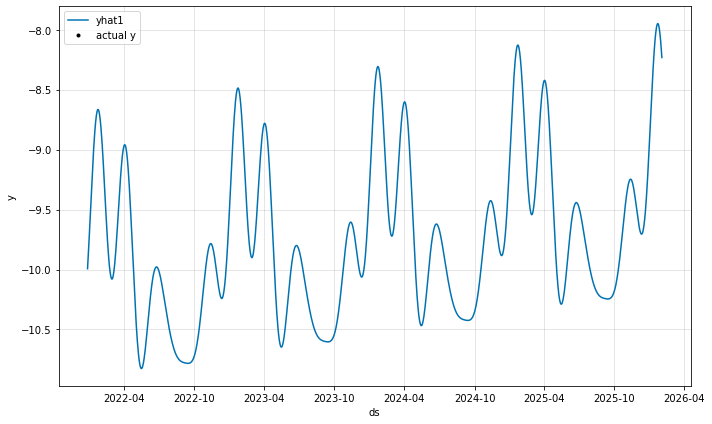

In [ ]:
fig_forecast = n.plot(new_forecast)
